In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from xgboost import XGBClassifier
import eli5
from eli5.sklearn import PermutationImportance
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

E:\Programy\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
E:\Programy\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data_path = 'procDF2.csv'
processed_df = pd.read_csv(data_path)
processed_df

,DIS,FLO,LOY,PRI,PIM,FEA,LAG,CHO
0,-0.43600,-0.056,1.0,0.1429,0.03510,-0.175710,1.0,9
1,3.85290,-0.576,1.0,0.8136,-0.48915,-0.588930,1.0,9
2,4.58810,0.260,1.0,0.1502,-0.09050,-0.195670,1.0,9
3,61.55460,-0.139,1.0,0.0817,-0.08200,-0.435940,1.0,9
4,1.70100,0.259,1.0,-0.1534,-0.05960,0.015470,1.0,9
...,...,...,...,...,...,...,...,...
3146269,4.10573,0.135,0.0,-2.1534,0.08141,5.524900,1.0,5
3146270,37.22023,2.173,0.0,-2.5829,0.11651,0.619060,1.0,5
3146271,0.03146,0.348,0.0,-1.2892,-0.19316,0.032053,1.0,5
3146272,5.57263,0.168,0.0,-2.1721,0.12531,1.746300,1.0,5


In [3]:
shops_features = ['DIS','FLO','LOY','PRI','PIM','FEA','LAG']
X = processed_df[shops_features]
y = processed_df.CHO

In [4]:
transformer_num = make_pipeline(
    StandardScaler()
)


X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y,stratify=y, test_size=0.33)



X_train = transformer_num.fit_transform(X_train)
X_valid = transformer_num.transform(X_valid)

In [5]:
xgb_model = XGBClassifier(random_state=1, learning_rate=0.5, n_estimators=100, max_depth=40)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=40,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
perm = PermutationImportance(xgb_model, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = shops_features)

Weight,Feature
0.4440 ± 0.0008,PIM
0.3329 ± 0.0007,FLO
0.2904 ± 0.0005,LOY
0.2220 ± 0.0004,DIS
0.0879 ± 0.0003,PRI
0.0134 ± 0.0001,FEA
0.0009 ± 0.0001,LAG


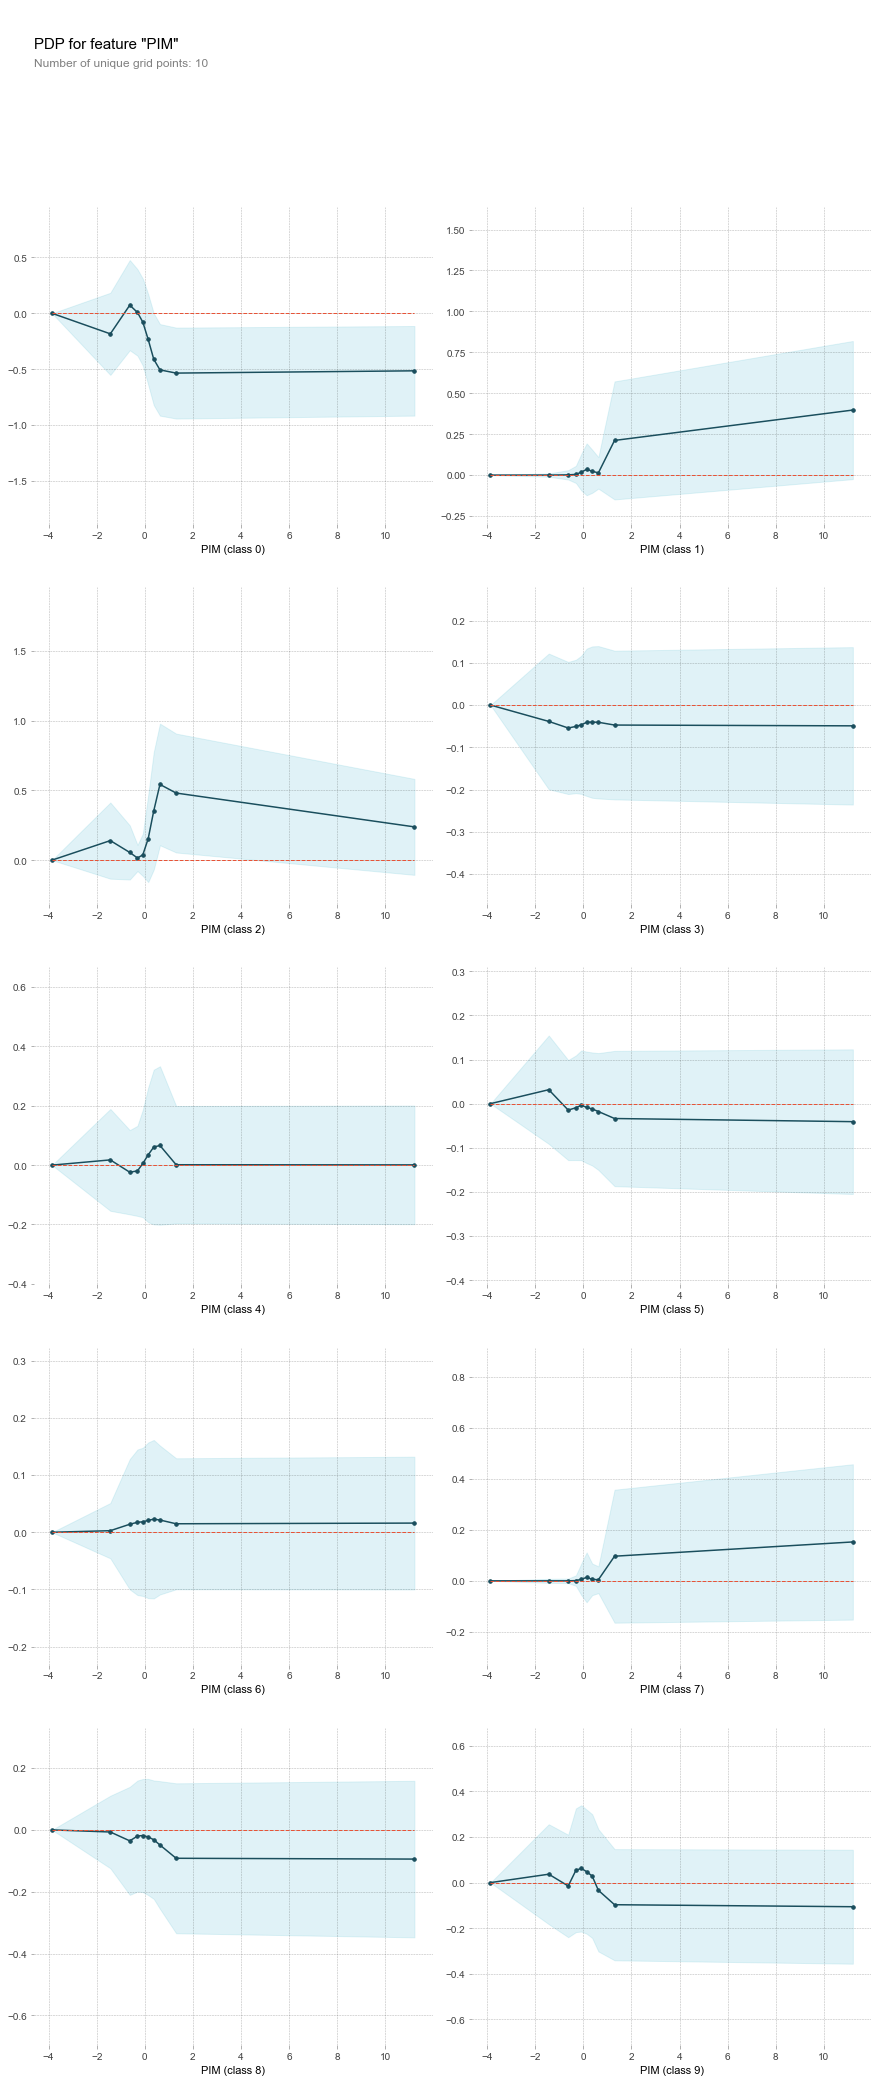

In [8]:
pim_plot = pdp.pdp_isolate(model=xgb_model, dataset=pd.DataFrame(data=X_valid, columns=['DIS','FLO','LOY','PRI','PIM','FEA','LAG']), model_features=shops_features, feature='PIM')
pdp.pdp_plot(pim_plot, 'PIM')
plt.show()

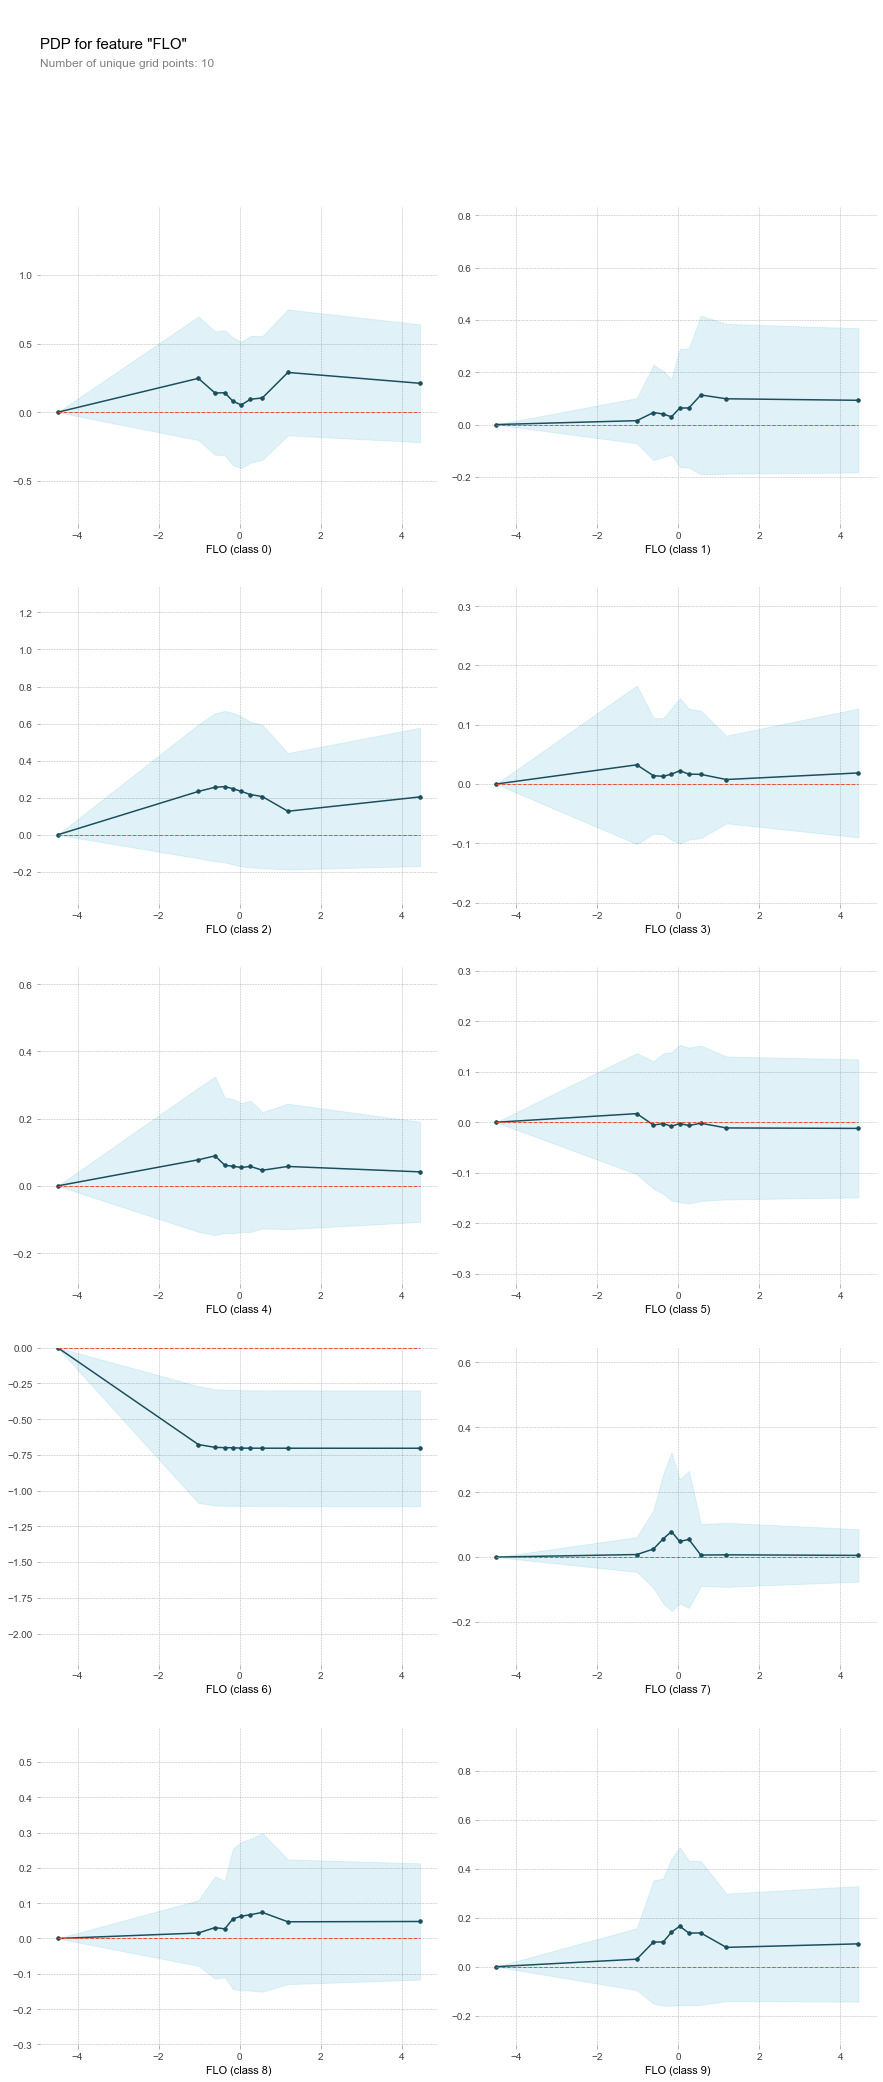

In [9]:
pim_plot = pdp.pdp_isolate(model=xgb_model, dataset=pd.DataFrame(data=X_valid, columns=['DIS','FLO','LOY','PRI','PIM','FEA','LAG']), model_features=shops_features, feature='FLO')
pdp.pdp_plot(pim_plot, 'FLO')
plt.show()

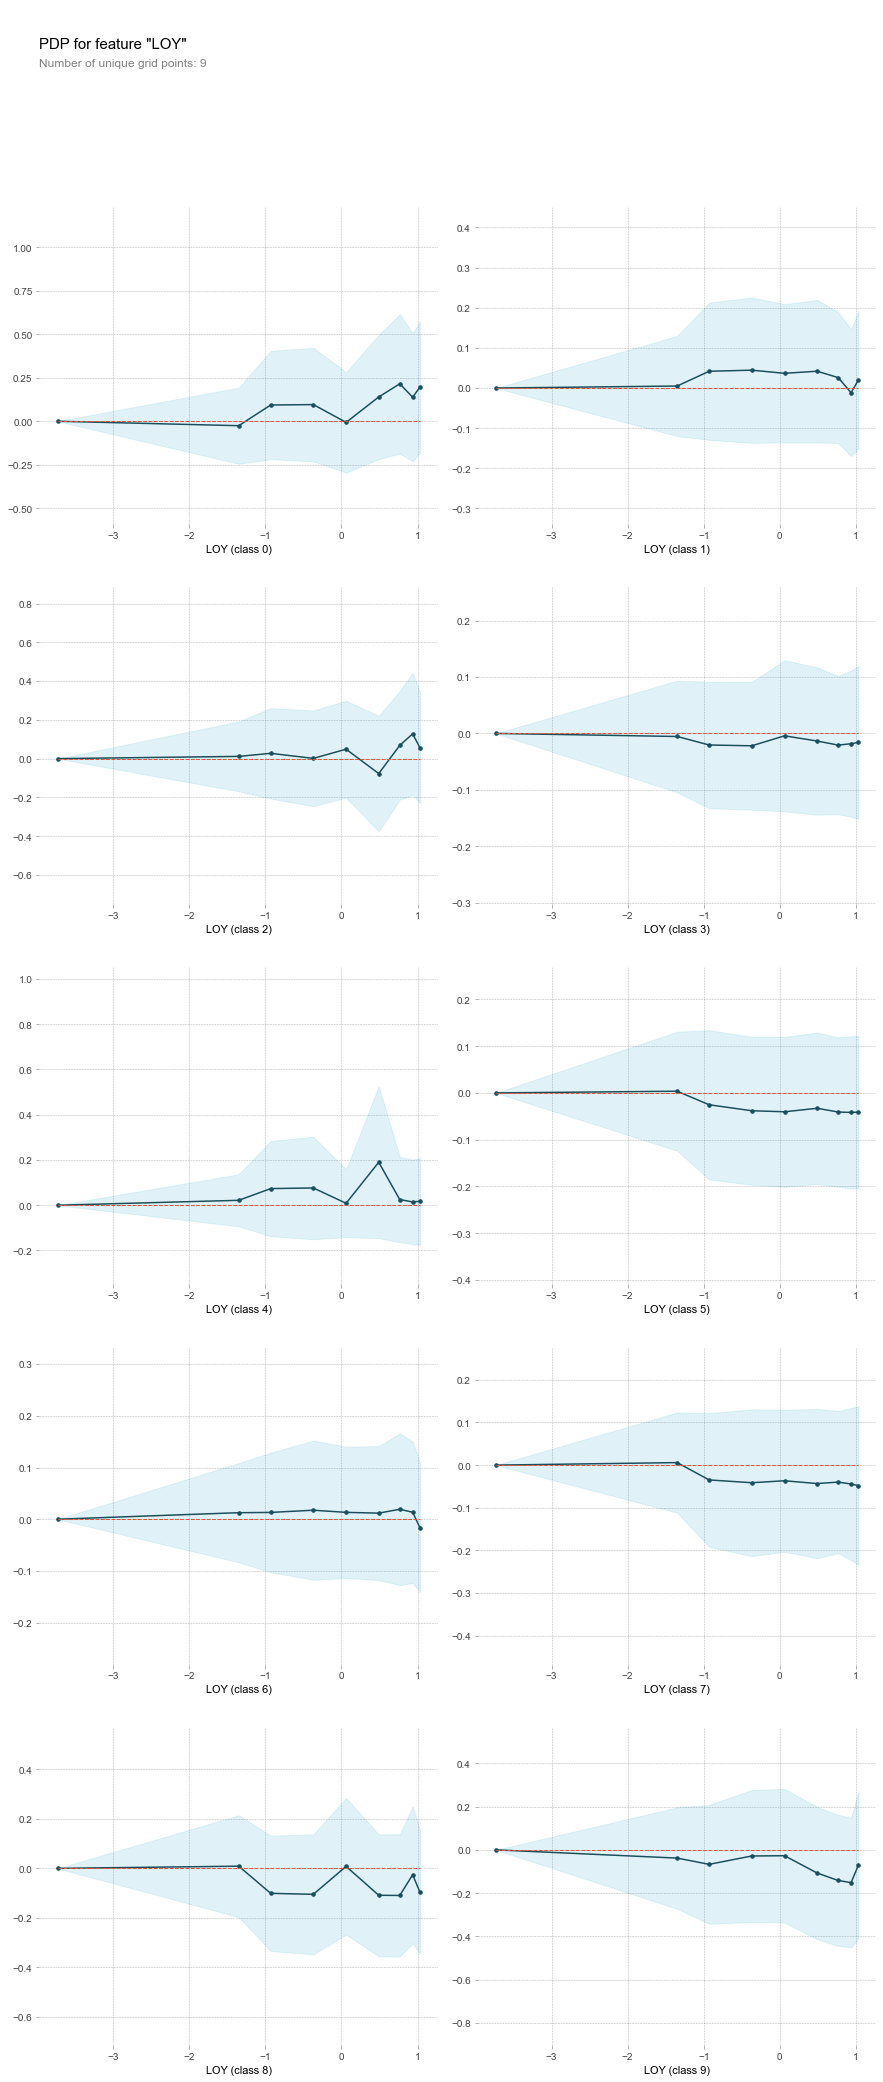

In [10]:
pim_plot = pdp.pdp_isolate(model=xgb_model, dataset=pd.DataFrame(data=X_valid, columns=['DIS','FLO','LOY','PRI','PIM','FEA','LAG']), model_features=shops_features, feature='LOY')
pdp.pdp_plot(pim_plot, 'LOY')
plt.show()